<a href="https://colab.research.google.com/github/Tucker6742/CNN-sex-and-gender/blob/main/CNN_Sex_and_Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\huge\text{Import kaggle and import dataset}$


In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"theunkovvn","key":"ba064e9386e385cc1042c624ed089930"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

In [ ]:
!unzip /content/utkface-new.zip -d /content/kaggle

$\huge\text{Import library}$


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
base_path = "/content/kaggle/UTKFace/"
files = os.listdir(base_path)
len(files)

23708

$\huge\text{Test for one image}$


In [ ]:
z = cv2.imread(base_path + files[0], cv2.IMREAD_GRAYSCALE)

In [ ]:
z = cv2.resize(z,dsize=(64,64))

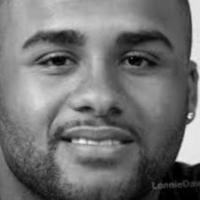

In [ ]:
cv2_imshow(z)

In [ ]:
images = []
ages = []
genders = []
for items in files:
    image = cv2.imread(base_path+items,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    split_var = items.split('_')
    ages.append(split_var[0])
    genders.append(int(split_var[1]) )

$\huge\text{Information}$


In [ ]:
files[0]

'34_0_4_20170113161453036.jpg.chip.jpg'

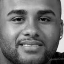

In [ ]:
cv2_imshow(images[0])

In [ ]:
ages[0]

'34'

In [ ]:
genders[0]

0

In [ ]:
info = pd.DataFrame([ages, genders]).T

In [ ]:
info.rename({0: "Age", 1: "Gender"}, axis = 1, inplace = True)

In [ ]:
info

,Age,Gender
0,34,0
1,40,0
2,78,0
3,32,1
4,2,0
...,...,...
23703,40,0
23704,47,1
23705,38,1
23706,59,0


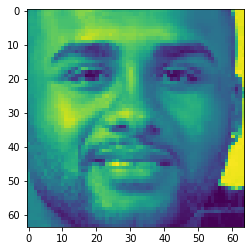

In [ ]:
plt.imshow(images[0][:, :, :])